In [3]:
import fcn32_vgg 
import numpy as np
import tensorflow as tf
import skimage.io
import skimage.transform
import utils
import scipy as scp
import scipy.misc
import loss
import pandas as pd
from tensorflow.python.framework import ops
from skimage.color.adapt_rgb import adapt_rgb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import uns

In [5]:
sess=tf.InteractiveSession()

In [6]:
labels= tf.placeholder(tf.int32,[None,420,580,2])
batch_images = tf.placeholder(tf.float32,[None,420,580,3])

In [7]:
### put your path to the pre-trained weights here...
vgg_path = '../tensorflow-fcn/vgg16.npy'

In [8]:
#net = fcn32_vgg.FCN32VGG(vgg16_npy_path=vgg_path)
#with tf.name_scope("content_vgg"):
#        net.build(batch_images, num_classes=2,debug=False)


In [9]:
net = fcn32_vgg.FCN32VGG(vgg16_npy_path=vgg_path)
net.build(batch_images, num_classes=2,debug=False)

print('Finished building Network.')

npy file loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
Layer name: conv2_2
Layer shape: (3, 3, 128, 128)
Layer name: conv3_1
Layer shape: (3, 3, 128, 256)
Layer name: conv3_2
Layer shape: (3, 3, 256, 256)
Layer name: conv3_3
Layer shape: (3, 3, 256, 256)
Layer name: conv4_1
Layer shape: (3, 3, 256, 512)
Layer name: conv4_2
Layer shape: (3, 3, 512, 512)
Layer name: conv4_3
Layer shape: (3, 3, 512, 512)
Layer name: conv5_1
Layer shape: (3, 3, 512, 512)
Layer name: conv5_2
Layer shape: (3, 3, 512, 512)
Layer name: conv5_3
Layer shape: (3, 3, 512, 512)
Layer name: fc6
Layer shape: [7, 7, 512, 4096]
Layer name: fc7
Layer shape: [1, 1, 4096, 4096]
Layer name: fc8
Layer shape: [1, 1, 4096, 1000]
Finished building Network.


In [10]:
output = tf.cast(net.upscore,tf.float32)

In [11]:
cost_function = loss.loss(output,labels,2)

In [12]:
train_step = tf.train.AdamOptimizer(1e-6).minimize(cost_function)

In [13]:
sess.run(tf.initialize_all_variables())

In [12]:
### the training data

In [14]:
from uns import training

In [37]:
my_batch  = uns.batch(training.iloc[range(5)])

In [77]:
my_batch_arr= my_batch.array_rgb()

In [78]:
my_batch_masks = my_batch.array_masks()

In [80]:
my_batch_arr.shape

(5, 420, 580, 3)

In [21]:
##test 1:
## making a prediction using pretrained weights 

In [29]:
im1 = my_batch_arr[0]

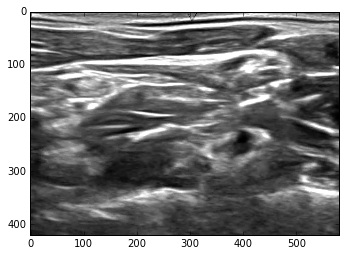

In [31]:
plt.imshow(im1)

In [27]:
im1.shape

(420, 580, 3)

In [28]:
pixelPrediction = sess.run(output,feed_dict={batch_images:np.array([im1])})

In [34]:
pixelPrediction.shape

(1, 420, 580, 2)

In [35]:
#out=sess.run(net.upscore,feed_dict={batch_images:np.array([im1])})

In [34]:
#out.shape

(1, 420, 580, 2)

In [23]:
## test cost function

In [17]:
cost=sess.run(cost_function,feed_dict={batch_images:my_batch_arr,labels:my_batch_masks})

In [18]:
cost

1.0063345

In [19]:
### test one step of training loop

In [36]:
time train_step.run(feed_dict={batch_images:my_batch_arr,labels:my_batch_masks})

CPU times: user 6min 5s, sys: 53.7 s, total: 6min 59s
Wall time: 2min 53s


In [21]:
new_cost=sess.run(cost_function,feed_dict={batch_images:my_batch_arr,labels:my_batch_masks})

In [22]:
### it went down! 

In [23]:
new_cost

0.95543444

In [90]:
def build_batch(batch):
     pass

In [88]:
def train_network(num_batches,update_period=50,metric=cost_function,track_cost=True,cross_validation_data=None): 
    """ num_batches: int, number of batches to train on
        update_period: int,  how often to print an update
        metric: tensor, the metric to use in printed updates
        track_cost. So far only implemented cost.
        cross_validation_data: ndarray, cross-validation data for testing and plotting learning curves
        """
    cost_history  =[]
    result=[cost_history]

    cvalidation_error_history= []
    
    for i in range(num_batches):
        batch = build_batch()
        if update_period is not None:
            if i % update_period == 0:
                current_cost = metric.eval(feed_dict={
                batch_images:batch[0], labels: batch[1]})
                cost_history.append(current_cost)
                print( "Cost after batch " +str(i) + ' ' + str(current_cost) )
                if cross_validation_data is not None:
                    validation_cost = metric.eval(feed_dict={
                batch_images:cross_validation_data[0], labels: cross_validation_data[1]})
                    cvalidation_error_history.append(validation_cost)
        train_step.run(feed_dict={batch_images:batch[0],labels:batch[1]})

    if cross_validation_data is not None:
        result.append(cvalidation_error_history)
    return result
        


In [89]:
train_network(3,1,cost_function,True,None)

Cost after batch 0 0.911415
Cost after batch 1 0.920865
Cost after batch 2 0.912261


NameError: name 'cross_valdiation_data' is not defined